Filename: v01_004800.jpg
Image Size: 596 x 334
Objects:
  - Grasper: (215, 189, 367, 250)
  - Grasper: (261, 88, 333, 142)


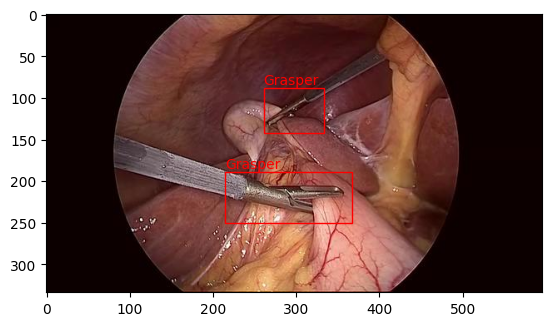

Filename: v01_054975.jpg
Image Size: 596 x 334
Objects:
  - SpecimenBag: (147, 149, 264, 237)
  - Grasper: (180, 143, 250, 193)


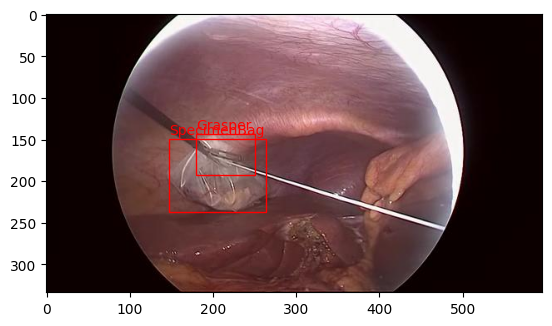

Filename: v03_054650.jpg
Image Size: 716 x 402
Objects:
  - Grasper: (51, 46, 334, 275)
  - Scissors: (418, 241, 628, 349)


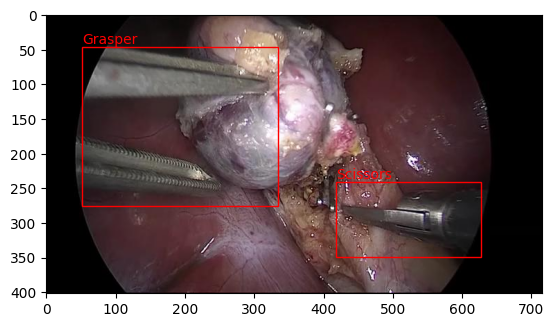

In [13]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def parse_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    filename = root.find('filename').text
    size = root.find('size')
    image_width = int(size.find('width').text)
    image_height = int(size.find('height').text)

    objects = []
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        objects.append({'name': obj_name, 'bbox': (xmin, ymin, xmax, ymax)})

    return filename, image_width, image_height, objects

def display_image_with_boxes(image_path, objects):
    image = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for obj in objects:
        xmin, ymin, xmax, ymax = obj['bbox']
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(xmin, ymin - 5, obj['name'], color='r')

    plt.show()

temp = ['v01_004800', 'v01_054975', 'v03_054650']
for i in temp:
  if __name__ == "__main__":
    xml_file_path = f"{i}.xml"
    image_path = f"{parse_xml(xml_file_path)[0]}"

    filename, width, height, objects = parse_xml(xml_file_path)
    print(f"Filename: {filename}")
    print(f"Image Size: {width} x {height}")
    print("Objects:")
    for obj in objects:
        print(f"  - {obj['name']}: {obj['bbox']}")

    display_image_with_boxes(image_path, objects)


all xml data

In [16]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

def parse_xml(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    filename = root.find('filename').text
    objects = []
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        objects.append({'name': obj_name, 'bbox': (xmin, ymin, xmax, ymax)})

    return filename, objects

def parse_folder(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".xml"):
            xml_path = os.path.join(folder_path, filename)
            image_filename, objects = parse_xml(xml_path)
            data.append({'filename': image_filename, 'objects': objects})
    return data

def create_dataframe(data):
    df = pd.DataFrame(columns=['filename', 'class', 'bbox'])

    for entry in data:
        for obj in entry['objects']:
            df = df.append({'filename': entry['filename'],
                            'class': obj['name'],
                            'bbox': obj['bbox']},
                           ignore_index=True)

    return df

def save_to_excel(dataframe, output_path='/content/gdrive/MyDrive/output.xlsx'):
    dataframe.to_excel(output_path, index=False)
    print(f"Data saved to {output_path}")

if __name__ == "__main__":
    folder_path = "/content/gdrive/MyDrive/proj_data/dataset/Annotations"
    data = parse_folder(folder_path)
    dataframe = create_dataframe(data)
    save_to_excel(dataframe)


Mounted at /content/gdrive


Streaming output truncated to the last 5000 lines.
<ipython-input-16-251275a21ae0>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': entry['filename'],
<ipython-input-16-251275a21ae0>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': entry['filename'],
<ipython-input-16-251275a21ae0>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': entry['filename'],
<ipython-input-16-251275a21ae0>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': entry['filename'],
<ipython-input-16-251275a21ae0>:40: FutureWarning: The frame.append method is

Data saved to /content/gdrive/MyDrive/output.xlsx


In [18]:
dataframe

,filename,class,bbox
0,v02_043900.jpg,Bipolar,"(398, 50, 696, 196)"
1,v02_043900.jpg,Grasper,"(383, 149, 595, 276)"
2,v10_031975.jpg,Clipper,"(291, 107, 452, 209)"
3,v06_056950.jpg,Irrigator,"(299, 75, 404, 150)"
4,v06_056950.jpg,Grasper,"(208, 56, 350, 113)"
...,...,...,...
3924,v05_059500.jpg,SpecimenBag,"(271, 9, 792, 302)"
3925,v05_059500.jpg,Grasper,"(531, 188, 820, 312)"
3926,v05_059500.jpg,Grasper,"(305, 99, 475, 212)"
3927,v09_046850.jpg,SpecimenBag,"(374, 113, 766, 275)"


In [19]:
#onehot encoded? - not working properly
import numpy as np

def create_dataframe(data):
    df = pd.DataFrame(columns=['filename', 'classes', 'bboxes'])

    for entry in data:
        classes = []
        bboxes = []

        for obj in entry['objects']:
            classes.append(obj['name'])
            bboxes.append(obj['bbox'])

        # Convert classes to one-hot encoding
        one_hot_classes = np.zeros(len(set(classes)))
        for i, unique_class in enumerate(set(classes)):
            if unique_class in classes:
                one_hot_classes[i] = 1

        df = df.append({'filename': entry['filename'],
                        'classes': tuple(one_hot_classes),
                        'bboxes': tuple(bboxes)},
                       ignore_index=True)

    return df

def save_to_excel(dataframe, output_path='/content/gdrive/MyDrive/onehot.xlsx'):
    dataframe.to_excel(output_path, index=False)
    print(f"Data saved to {output_path}")

if __name__ == "__main__":
    folder_path = "/content/gdrive/MyDrive/proj_data/dataset/Annotations"
    data = parse_folder(folder_path)
    dataframe = create_dataframe(data)
    save_to_excel(dataframe)

In [22]:
#wider?
import numpy as np

def create_dataframe(data):
    df = pd.DataFrame(columns=['filename', 'objects'])

    for entry in data:
        objects = [(obj['name'], obj['bbox']) for obj in entry['objects']]
        df = df.append({'filename': entry['filename'], 'objects': objects}, ignore_index=True)

    return df


def save_to_excel(dataframe, output_path='/content/gdrive/MyDrive/output_wider.xlsx'):
    dataframe.to_excel(output_path, index=False)
    print(f"Data saved to {output_path}")


if __name__ == "__main__":
    folder_path = "/content/gdrive/MyDrive/proj_data/dataset/Annotations"
    data = parse_folder(folder_path)
    dataframe = create_dataframe(data)
    save_to_excel(dataframe)

Streaming output truncated to the last 5000 lines.
<ipython-input-22-823d9825be45>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': entry['filename'], 'objects': objects}, ignore_index=True)
<ipython-input-22-823d9825be45>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': entry['filename'], 'objects': objects}, ignore_index=True)
<ipython-input-22-823d9825be45>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': entry['filename'], 'objects': objects}, ignore_index=True)
<ipython-input-22-823d9825be45>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.

Data saved to /content/gdrive/MyDrive/output_wider.xlsx


In [23]:
dataframe

,filename,objects
0,v02_043900.jpg,"[(Bipolar, (398, 50, 696, 196)), (Grasper, (38..."
1,v10_031975.jpg,"[(Clipper, (291, 107, 452, 209))]"
2,v06_056950.jpg,"[(Irrigator, (299, 75, 404, 150)), (Grasper, (..."
3,v10_024450.jpg,"[(Clipper, (284, 135, 386, 195))]"
4,v09_002350.jpg,"[(Grasper, (95, 112, 358, 225))]"
...,...,...
2806,v07_031850.jpg,"[(SpecimenBag, (290, 6, 444, 113))]"
2807,v06_069675.jpg,"[(Irrigator, (285, 141, 395, 216)), (Grasper, ..."
2808,v09_038675.jpg,"[(Hook, (409, 63, 588, 207))]"
2809,v05_059500.jpg,"[(SpecimenBag, (271, 9, 792, 302)), (Grasper, ..."


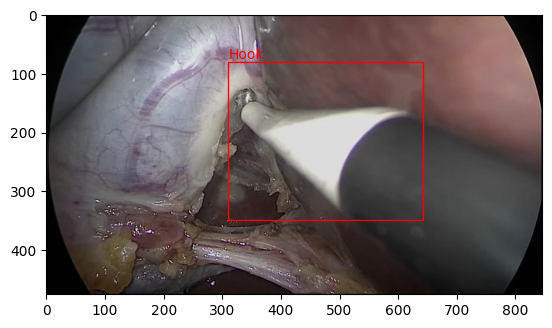

In [24]:
#visualize with location
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_row(dataframe, row_index):
    row = dataframe.iloc[row_index]
    filename = row['filename']
    objects = row['objects']

    image_path = f"/content/gdrive/MyDrive/proj_data/dataset/dummy root/dummy class/{filename}"
    image = Image.open(image_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for obj in objects:
        class_name, bbox = obj
        xmin, ymin, xmax, ymax = bbox
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(xmin, ymin - 5, class_name, color='r')

    plt.show()

# Example: Visualize row at index 100
row_index = 100
visualize_row(dataframe, row_index)


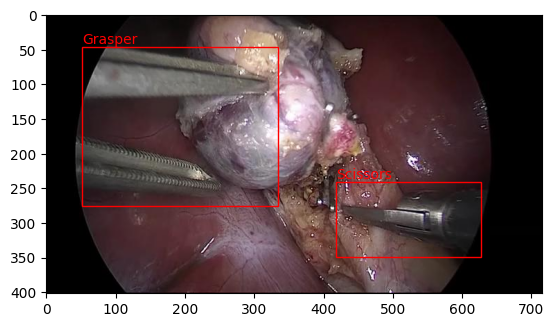

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_image(dataframe, filename):
    row = dataframe[dataframe['filename'] == filename].iloc[0]
    objects = row['objects']

    image_path = f"/content/gdrive/MyDrive/proj_data/dataset/dummy root/dummy class/{filename}"
    image = Image.open(image_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for obj in objects:
        class_name, bbox = obj
        xmin, ymin, xmax, ymax = bbox
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(xmin, ymin - 5, class_name, color='r')

    plt.show()

# Example: Visualize image with filename "v03_054650"
image_filename = "v03_054650.jpg"  # Adjust the filename as needed
visualize_image(dataframe, image_filename)


In [35]:
#create subdatasets based on given text files
train_txt_path = '/content/gdrive/MyDrive/subdatasets/train.txt'
test_txt_path = '/content/gdrive/MyDrive/subdatasets/test.txt'
val_txt_path = '/content/gdrive/MyDrive/subdatasets/val.txt'
trainval_txt_path = '/content/gdrive/MyDrive/subdatasets/trainval.txt'

with open(test_txt_path, 'r') as file:
        filenames = [line.strip() for line in file.readlines()]

filenames

['v01_002075',
 'v01_004450',
 'v01_007125',
 'v01_018000',
 'v01_025625',
 'v01_027600',
 'v01_027850',
 'v01_027975',
 'v01_028075',
 'v01_028125',
 'v01_028175',
 'v01_028325',
 'v01_028475',
 'v01_029500',
 'v01_034300',
 'v01_036550',
 'v01_046350',
 'v01_053975',
 'v01_054475',
 'v01_055625',
 'v01_056375',
 'v01_056550',
 'v01_056625',
 'v01_056750',
 'v01_056900',
 'v01_057400',
 'v02_000400',
 'v02_001175',
 'v02_001350',
 'v02_002575',
 'v02_007525',
 'v02_007850',
 'v02_008100',
 'v02_009950',
 'v02_011750',
 'v02_011925',
 'v02_012275',
 'v02_012525',
 'v02_012550',
 'v02_012625',
 'v02_012750',
 'v02_015675',
 'v02_018900',
 'v02_018925',
 'v02_018950',
 'v02_018975',
 'v02_019050',
 'v02_019600',
 'v02_019700',
 'v02_019750',
 'v02_024550',
 'v02_026650',
 'v02_026750',
 'v02_026825',
 'v02_027125',
 'v02_027850',
 'v02_036950',
 'v02_038375',
 'v02_039800',
 'v02_041375',
 'v02_042375',
 'v02_042450',
 'v02_043275',
 'v02_043875',
 'v02_044175',
 'v02_044275',
 'v02_0447

In [64]:
def load_subset_dataframe(dataframe, txt_path):
    with open(txt_path, 'r') as file:
        filenames = [str(line.strip())+".jpg" for line in file]

    filenames_df = pd.DataFrame({'filename': filenames})
    filenames_df['filename'] = filenames_df['filename'].str.strip()

    # Make the merge case-insensitive
    subset_df = pd.merge(dataframe, filenames_df, on='filename', how='inner').copy()
    return subset_df

# Rest of your code remains the same


# Create DataFrames for each subset
train_df = load_subset_dataframe(dataframe, train_txt_path)
test_df = load_subset_dataframe(dataframe, test_txt_path)
# with open(test_txt_path, 'r') as file:
#         filenames = [str(line.strip())+".jpg" for line in file]
val_df = load_subset_dataframe(dataframe, val_txt_path)
trainval_df = load_subset_dataframe(dataframe, trainval_txt_path)

# # Print some information for debugging
# print("Number of rows in train_df:", len(train_df))
# print("Number of rows in test_df:", len(test_df))
# print("Number of rows in val_df:", len(val_df))
# print("Number of rows in trainval_df:", len(trainval_df))

train_df.to_csv('/content/gdrive/MyDrive/train.csv', index=False)
test_df.to_csv('/content/gdrive/MyDrive/test.csv', index=False)
val_df.to_csv('/content/gdrive/MyDrive/val.csv', index=False)
trainval_df.to_csv('/content/gdrive/MyDrive/trainval.csv', index=False)